# Fussing with the images

In [1]:
import os
import glob
from importlib import reload

import numpy as np

import xarray

from ulmo.analysis import evaluate
from ulmo.models import io as model_io

# Grab the SST data

wget -r --no-parent -A stcc_iop25_20250127* https://marine.rutgers.edu/~jzavala/ARCTEX_IOP2025/him_sst/

# Load an image

In [16]:
#img_file = '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250120000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc'
img_path =  '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/'
img_file = os.path.join(img_path, 'stcc_iop25_20250126070000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')

ds = xarray.open_dataset(img_file)

In [17]:
ds

<xarray.Dataset> Size: 7MB
Dimensions:                  (time: 1, lat: 297, lon: 446)
Coordinates:
  * lat                      (lat) float32 1kB 22.95 22.93 22.91 ... 17.05 17.03
  * lon                      (lon) float32 2kB 125.0 125.0 125.1 ... 133.9 133.9
  * time                     (time) datetime64[ns] 8B 2025-01-26T07:00:00
Data variables: (12/13)
    crs                      int32 4B ...
    dt_analysis              (time, lat, lon) float32 530kB ...
    l2p_flags                (time, lat, lon) int16 265kB ...
    or_number_of_pixels      (time, lat, lon) float64 1MB ...
    quality_level            (time, lat, lon) float32 530kB ...
    satellite_zenith_angle   (time, lat, lon) float32 530kB ...
    ...                       ...
    sses_bias                (time, lat, lon) float32 530kB ...
    sses_standard_deviation  (time, lat, lon) float32 530kB ...
    sst_dtime                (time, lat, lon) timedelta64[ns] 1MB ...
    sst_front_position       (time, lat, lon) float32 530kB ...
    sst_gradient_magnitude   (time, lat, lon) float32 530kB ...
    wind_speed               (time, lat, lon) float32 530kB ...
Attributes: (12/57)
    Conventions:                CF-1.7, ACDD-1.3
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    SSTs are a weighted average of the SSTs of co...
    creator_email:              Alex.Ignatov@noaa.gov
    creator_name:               Alex Ignatov
    ...                         ...
    col_count:                  18000
    l3u_bias_subskin_night:     0.0
    l3u_bias_subskin_day:       0.0
    l3u_bias_depth_night:       0.0
    l3u_bias_depth_day:         0.0
    NCO:                        netCDF Operators version 5.1.5 (Homepage = ht...

In [20]:
ds.time.attrs

{'axis': 'T',
 'comment': 'Seconds since 1981-01-01 00:00:00',
 'long_name': 'reference time of sst file',
 'standard_name': 'time',
 'coverage_content_type': 'coordinate'}

## Plot SST

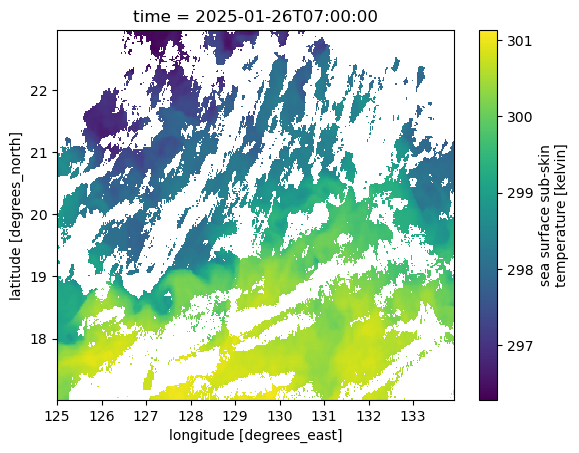

In [4]:
ds.sea_surface_temperature.plot()

## Flags

In [5]:
ds.l2p_flags

<xarray.DataArray 'l2p_flags' (time: 1, lat: 297, lon: 446)> Size: 265kB
[132462 values with dtype=int16]
Coordinates:
  * lat      (lat) float32 1kB 22.95 22.93 22.91 22.89 ... 17.07 17.05 17.03
  * lon      (lon) float32 2kB 125.0 125.0 125.1 125.1 ... 133.9 133.9 133.9
  * time     (time) datetime64[ns] 8B 2025-01-26T07:00:00
Attributes:
    comment:                L2P common flags in bits 1-3 and data provider fl...
    flag_masks:             [     1      2      4    128    256    512   1024...
    flag_meanings:          microwave land ice solar invalid_radiance daytime...
    long_name:              L2P flags
    valid_max:              32767
    valid_min:              -32768
    grid_mapping:           crs
    coverage_content_type:  thematicClassification

In [18]:
ds.time

<xarray.DataArray 'time' (time: 1)> Size: 8B
array(['2025-01-26T07:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-26T07:00:00
Attributes:
    axis:                   T
    comment:                Seconds since 1981-01-01 00:00:00
    long_name:              reference time of sst file
    standard_name:          time
    coverage_content_type:  coordinate

# Stack a few

In [6]:
jan26_files = glob.glob(os.path.join(img_path, 'stcc_iop25_20250126*'))
jan26_files[0:3]

['/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250126130000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc',
 '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250126180000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc',
 '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250126200000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc']

## Read and stack

### Read

In [7]:
imgs = []
for ifile in jan26_files:
    ds = xarray.open_dataset(ifile)
    imgs.append(ds.sea_surface_temperature.data)
#
imgs = np.concatenate(imgs)

### Stack

In [8]:
sst_stack = np.nanmedian(imgs, axis=0)
sst_stack.shape

/tmp/ipykernel_785132/2252823884.py:1: RuntimeWarning: All-NaN slice encountered
  sst_stack = np.nanmedian(imgs, axis=0)


(297, 446)

## Fake a ds

In [24]:
ds_stack = ds.sea_surface_temperature.copy()
ds_stack.data = sst_stack.reshape((1,297,446))

In [25]:
ds_stack

<xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 297, lon: 446)> Size: 530kB
array([[[      nan,       nan,       nan, ..., 297.59   , 297.55   ,
         297.53   ],
        [      nan,       nan,       nan, ..., 297.59   , 297.57   ,
         297.55   ],
        [      nan,       nan,       nan, ..., 297.62   , 297.57   ,
         297.565  ],
        ...,
        [300.03998, 300.03998, 300.065  , ..., 300.97   , 301.005  ,
         301.005  ],
        [300.02   , 300.07   , 300.07   , ..., 301.00998, 301.02   ,
         301.01498],
        [300.07   , 300.07   , 300.01498, ..., 301.00998, 301.02   ,
         301.02   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 22.95 22.93 22.91 22.89 ... 17.07 17.05 17.03
  * lon      (lon) float32 2kB 125.0 125.0 125.1 125.1 ... 133.9 133.9 133.9
  * time     (time) datetime64[ns] 8B 2025-01-26T07:00:00
Attributes:
    comment:                SST obtained by regression with buoy measurements...
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  kelvin
    valid_max:              32767
    valid_min:              -32767
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement

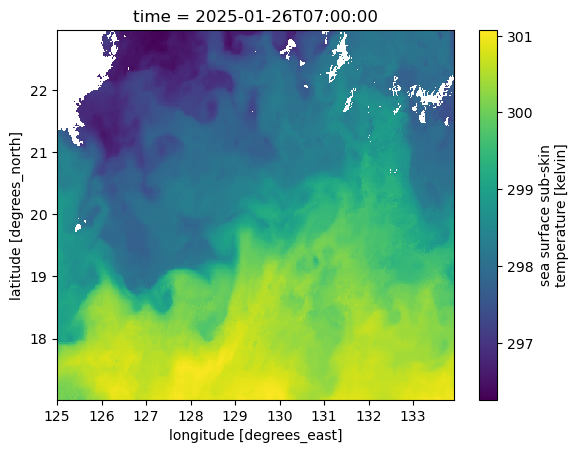

In [27]:
ds_stack.plot()

# Check the size

In [28]:
ds.lat.data[0:2]

array([22.95, 22.93], dtype=float32)

In [29]:
R_earth = 6371. # km
circum = 2 * np.pi* R_earth
km_deg = circum / 360.

In [30]:
0.02 * km_deg

2.223898532891175

# Cut me out

In [31]:
ds_stack.lat

<xarray.DataArray 'lat' (lat: 297)> Size: 1kB
array([22.95, 22.93, 22.91, ..., 17.07, 17.05, 17.03], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 22.95 22.93 22.91 22.89 ... 17.07 17.05 17.03
Attributes:
    long_name:              latitude
    comment:                Latitudes for locating data
    units:                  degrees_north
    axis:                   Y
    valid_min:              -90.0
    valid_max:              90.0
    standard_name:          latitude
    coverage_content_type:  coordinate

In [32]:
region = ds_stack.sel(lat=slice(21.28, 20.), 
                 lon=slice(130., 131.28))

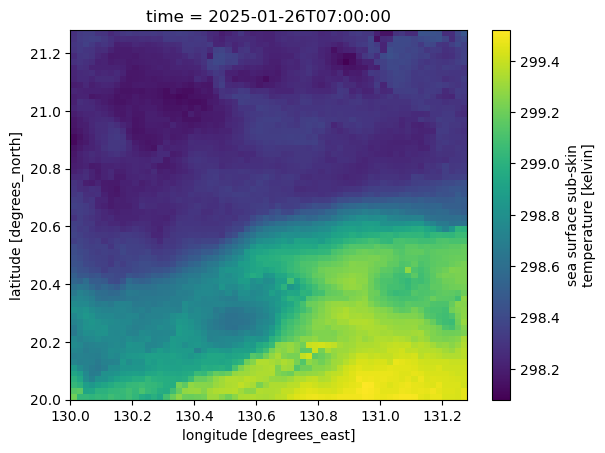

In [33]:
region.plot()

# Write

In [34]:
region.to_netcdf('SST_stack_2025jan26.nc')